# Zadanie 3 Pracownia Specjalistyczna - Eksploracja danych
### Krzysztof Funkowski

In [1]:
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zadanie - wybielanie

### Funkcja służąca do obliczania kowariancji dla dwóch wektorów

In [181]:
def cov(x, y, x_avg, y_avg):
    elements_count = len(x) # ilość elementów w tablicy
    elements_sum = 0
    
    for x,y in zip(x,y):
        elements_sum = elements_sum + ((x - x_avg)*(y - y_avg)) # sumowanie (x - średnia_arytmetyczna_x) * (y - średnia_arytmetyczna_y)
    
    return elements_sum / elements_count # suma dzielona przez liczbę elementów

### Funkcja obliczająca macierz kowariancji dla zbioru danych

In [182]:
def cov_for_dataset(cov_dataset):
    avgs = []
    matrix_shape = cov_dataset.shape[1] # wymiary_macierzy czyli liczba_kolumn_bioru_danych x liczba_kolumn_bioru_danych
    for i in range(matrix_shape):
        avgs.append(cov_dataset[:,i].mean()) # obliczanie średnich dla każdego parametru
    
    matrix = []
    for i in range(matrix_shape):
        matrix_row = []
        for j in range(matrix_shape):
            #matrix_shape*i + j
            res = cov(cov_dataset[:,i],cov_dataset[:,j],avgs[i], avgs[j]) # wyznaczanie kowariancji dla każdej pary parametrów
            matrix_row.append(res) # budowanie wiersza macierzy
        matrix.append(matrix_row) # dodawanie wiersza macierzy do tablicy bazowej
    
    return np.matrix(matrix) # przekształcanie typu tablicy na macierz

### Funkcja do obliczania długości wektora własnego

In [183]:
def eigenvector_len(v1):
    dims = v1.shape[0] # ilość elementów wektora
    length = 0
    
    for i in range(dims):
        val = v1[i].ravel().tolist()[0][0]
        length = length + pow(val,2) # sumowanie elementów podniesionych do kwadratu
        
    
    length = sqrt(length) # pierwiastkowanie wyniku sumy elementów wektora podniesionych do kwadratów
    
    return length # zwracanie długości

### Funkcja normalizująca, zwracająca wartość własną i wektor własny

In [184]:
def eigenvector_normalization(v1):
    eigenvalue = eigenvector_len(v1) # wylicznaie wartości własnej
    eigenvector = v1 / eigenvalue # wyliczanie wektora własnego
    
    return eigenvalue, eigenvector # zwrócenie wartości własnej i wektora własnego

### Pomocnicza funkcja zmieniająca tablicę wektorów własnych w odpowiednią formę macierzy

In [185]:
def rearrange_matrix(eigenvectors):
    res = []

    for i in range(len(eigenvectors)):
        row = eigenvectors[i].ravel().tolist()[0]
        res.append(row)

    return np.matrix(res).T

### Funkcja odpowiadająca za obliczanie wartości własnych i wektorów własnych

In [186]:
def eigenvalues_eigenvectors(matrix, num_iterations):
    n = matrix.shape[0] # jeden z wymiarów macierzy, ponieważ jest kwadratowa to wystarczy tylko jeden
    eigenvalues = [] # lista na wartości własne
    eigenvectors = [] # lista na wektory własne
    
    for i in range(n):
        # losowe dane wektora na początku
        eigenvector = np.random.rand(n,1)
    
        # algorytm iteracyjny wykonywany num_iterations razy
        for _ in range(num_iterations):
            eigenvector = np.dot(matrix, eigenvector) # mnożenie macierzy kowariancji przez wektor 
            eigenvalue, eigenvector = eigenvector_normalization(eigenvector) # normalizacja wektora
            
        # usuwanie z macierzy znalezionej wartości własnej i wektora własnego
        # marix - wartość własna * iloczyn zewnętrzny wektora własnego
        matrix = matrix - eigenvalue * np.multiply(eigenvector,eigenvector.T).T 
        
        eigenvalues.append(eigenvalue) # dodanie znalezionej wartości własnej do listy
        eigenvectors.append(eigenvector) # dodanie znalezionego wektora własnego do listy
        
        
        
    return eigenvalues, rearrange_matrix(eigenvectors) # zwrócenie wartości własnych i wektorów własnych

### Wczytanie zbioru Irisa i konwersja na dataframe'a

In [271]:
df = pd.read_csv('Iris.csv', sep=',', index_col=0)
dataset = df.to_numpy()
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Gatunki występujące w zbiorze

In [272]:
species = np.array(list(set(dataset[:,4])))
species

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype='<U15')

### Seria 1 - Iris-setosa

In [215]:
species1 = df[df['Species'].str.contains('Iris-setosa')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species1 = species1[:, [0, 1]]

### Macierz kowariancji, wektory i wartości własne dla zbioru danych 1

In [216]:
num_iterations = 10000 # ustalenie liczby iteracji
species1_cov_matrix = cov_for_dataset(species1) # macierz kowariancji dla głównego w tym momencie gatunku
# wartości własne i wektory własne dla badanego gatunku
species1_eigenvalues, species1_eigenvectors = eigenvalues_eigenvectors(species1_cov_matrix,num_iterations)
print(f'Iris-setosa: \n macierz cov:\n{species1_cov_matrix} \n\n wartości własne: {species1_eigenvalues}\n wektory własne:\n{species1_eigenvectors}')

Iris-setosa: 
 macierz cov:
[[0.121764 0.098292]
 [0.098292 0.142276]] 

 wartości własne: [0.23084561813618973, 0.033194381863810234]
 wektory własne:
[[ 0.66941065  0.74289258]
 [ 0.74289258 -0.66941065]]


### Projekcja pierwszego zbioru danych rozpiętego na dwa wektory własne

In [217]:
s1 = np.asarray(species1 * species1_eigenvectors)
s1

array([[6.014118339365684, 1.4458148567867712],
       [5.508789921041103, 1.6319416674121547],
       [5.523486305909797, 1.3494810218846913],
       [5.382255983146065, 1.3421328294503443],
       [6.02146653180003, 1.3045845340230398],
       [6.5120985652559185, 1.4009183689251201],
       [5.605123755943183, 1.1413096339562672],
       [5.8728880166019515, 1.4384666643524242],
       [5.099795337618602, 1.3274364445816509],
       [5.583079178640142, 1.5650006022474625],
       [6.36352005005784, 1.5348004992545046],
       [5.739005886272567, 1.2898881491543457],
       [5.44184885587641, 1.557652409813115],
       [5.107143530052948, 1.1862061218179187],
       [6.854152083513727, 1.631134334156585],
       [7.084368048745192, 1.2890808158987763],
       [6.5120985652559185, 1.4009183689251201],
       [6.014118339365684, 1.4458148567867712],
       [6.638632503150956, 1.6907272068869306],
       [6.236986112162802, 1.2449916612926946],
       [6.140652277260722, 1.7356236947485

### Seria druga - Iris-versicolor

In [218]:
species2 = df[df['Species'].str.contains('Iris-versicolor')].to_numpy() # wybieranie danych tylko dla badanego gatunku
species2 = species2[:, [0, 1]]

### Macierz kowariancji, wektory i wartości własne dla zbioru danych 2

In [219]:
num_iterations = 10000 # ustalenie liczby iteracji
species2_cov_matrix = cov_for_dataset(species2) # macierz kowariancji dla głównego w tym momencie gatunku
# wartości własne i wektory własne dla badanego gatunku
species2_eigenvalues, species2_eigenvectors = eigenvalues_eigenvectors(species2_cov_matrix,num_iterations)
print(f'Iris-versicolor: \n macierz cov:\n{species2_cov_matrix} \n\n wartości własne: {species2_eigenvalues}\n wektory własne:\n{species2_eigenvectors}')

Iris-versicolor: 
 macierz cov:
[[0.261104 0.08348 ]
 [0.08348  0.0965  ]] 

 wartości własne: [0.29603053579227206, 0.061573464207728044]
 wektory własne:
[[ 0.92251411  0.38596337]
 [ 0.38596337 -0.92251411]]


### Projekcja drugiego zbioru danych rozpiętego na dwa wektory własne

In [220]:
s2 = np.asarray(species2 * species2_eigenvectors) # projekcja zbioru danych rozpiętego na dwa pierwsze wektory własne
s2

array([[7.692681530291958, -0.2503015651269349],
       [7.139173065871466, -0.4818795861368508],
       [7.561833782720223, -0.19664649122517197],
       [5.961543337725853, 0.0010160789790130131],
       [7.07703912926827, -0.0742776063548698],
       [6.339027843374281, -0.38304830103475807],
       [7.085517991969703, -0.6127273337085852],
       [5.446631210140349, -0.3228133527676518],
       [7.207886876840005, -0.12793268025663274],
       [5.839174452855552, -0.4837785744729399],
       [5.384497273537152, 0.08478862701432854],
       [6.600723338517751, -0.4903584488382835],
       [6.384204054574611, 0.2862491738906914],
       [6.746629823156262, -0.32091436443156285],
       [6.285372769472518, -0.513896048606493],
       [7.3773309612467255, -0.27383916489514437],
       [6.323969106307504, -0.6061474593432421],
       [6.392682917276043, -0.2522005534630236],
       [6.568706876048108, 0.36344184756066333],
       [6.1309874221325735, -0.14489040565949862],
       [6.677

### Projekcja zbiorów

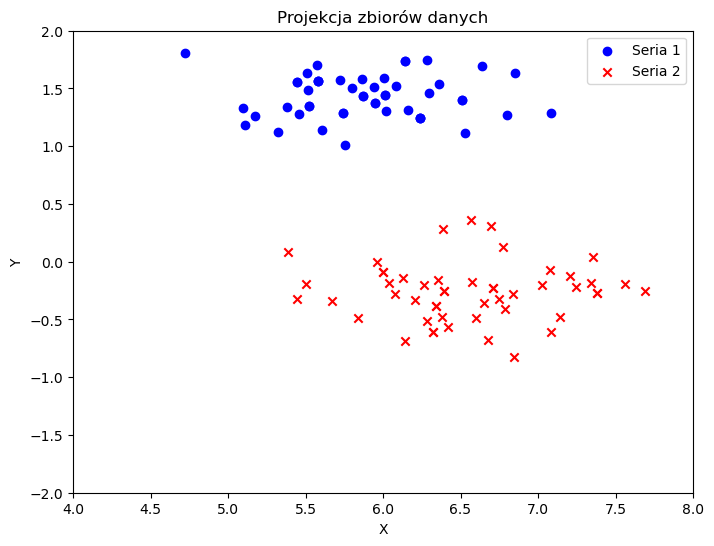

In [222]:
plt.figure(figsize=(8, 6))

plt.scatter(s1[:,[0]], s1[:,[1]], label='Seria 1', color='blue', marker='o')
plt.scatter(s2[:,[0]], s2[:,[1]], label='Seria 2', color='red', marker='x')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(4, 8)
plt.ylim(-2, 2)

plt.legend()
plt.title('Projekcja zbiorów danych')
plt.show()

### Macierz kowariancji dla 1 serii
Jest diagonalna, czyli zmienne nie mają między sobą korelacji. W tym kroku jest to obserwacja, ale ta sytuacja nie musi wystąpić.

In [225]:
cov_dataset = np.array(s1, dtype='double')
cov_matrix = cov_for_dataset(cov_dataset)
cov_matrix 
# na drugiej przekątnej widać że dane słabo skorelowane
# otrzymujemy macierz diagonalna

matrix([[2.30845618e-01, 9.73179870e-17],
        [9.73179870e-17, 3.31943819e-02]])

### Seria 1 - Wartości i wektory własne
Wektory własne są macierzą diagonalną

In [227]:
num_iterations = 10000
eigenvalues_1, eigenvectors_1 = eigenvalues_eigenvectors(cov_matrix, num_iterations)

print(f"Wartość własna:\n {eigenvalues_1}")
print(f"Wektor własny:\n {eigenvectors_1}")

Wartość własna:
 [0.23084561813618992, 0.03319438186381024]
Wektor własny:
 [[ 1.00000000e+00 -4.92372266e-16]
 [ 4.92372266e-16  1.00000000e+00]]


In [228]:
K = eigenvectors_1
K

matrix([[ 1.00000000e+00, -4.92372266e-16],
        [ 4.92372266e-16,  1.00000000e+00]])

### A = INV(I * pierwiastek_2(wartości_własne))

In [229]:
A = np.identity(2) * eigenvalues_1
A = np.linalg.inv(np.identity(2) * np.sqrt(eigenvalues_1)) # INV(I * wartości_własne)
A

array([[2.08132156, 0.        ],
       [0.        , 5.48867742]])

### Seria 1 - przekształcenie 1

In [230]:
# p1 = przekształcenie pierwsze
s1_p1 = (A * K * np.array(s1, dtype='double').T).T
s1_p1 = np.array(s1_p1)
s1_p1

array([[12.51731415,  7.93561136],
       [11.46556321,  8.95720138],
       [11.49615112,  7.40686601],
       [11.2022054 ,  7.36653415],
       [12.5326081 ,  7.16044367],
       [13.55377112,  7.68918902],
       [11.6660649 ,  6.26428042],
       [12.22336843,  7.8952795 ],
       [10.61431397,  7.28587044],
       [11.62018305,  8.58978347],
       [13.24453146,  8.42402484],
       [11.94471667,  7.07977996],
       [11.32623733,  8.54945161],
       [10.62960792,  6.51070275],
       [14.26569449,  8.95277019],
       [14.74484794,  7.07534877],
       [13.55377112,  7.68918902],
       [12.51731415,  7.93561136],
       [13.81712894,  9.27985624],
       [12.98117364,  6.83335762],
       [12.78067196,  9.52627858],
       [12.82655381,  7.20077553],
       [11.97530457,  5.52944459],
       [12.20807448,  8.67044718],
       [11.94471667,  7.07977996],
       [11.6048891 ,  9.36495115],
       [12.22336843,  7.8952795 ],
       [12.65664003,  8.34336113],
       [12.50202019,

### Macierz kowariancji dla serii 1 - pierwszego przekształcenia
Możemy zauważyć że jest jednostkowa, co oznacza brak korelacji między zmiennymi

In [232]:
cov_matrix_s1_p1 = cov_for_dataset(s1_p1)
cov_matrix_s1_p1

matrix([[1.00000000e+00, 2.56183963e-15],
        [2.56183963e-15, 1.00000000e+00]])

### Seria 2 - przekształcenie 1 (na podstawie A i wektorów własnych serii 1)

In [233]:
s2_p1 = (A * K * np.array(s2, dtype='double').T).T
s2_p1 = np.array(s2_p1)
s2_p1

array([[ 1.60109439e+01, -1.37382455e+00],
       [ 1.48589148e+01, -2.64488160e+00],
       [ 1.57386077e+01, -1.07932916e+00],
       [ 1.24078887e+01,  5.57692975e-03],
       [ 1.47295941e+01, -4.07685821e-01],
       [ 1.31935553e+01, -2.10242856e+00],
       [ 1.47472413e+01, -3.36306268e+00],
       [ 1.13361909e+01, -1.77181836e+00],
       [ 1.50019303e+01, -7.02181213e-01],
       [ 1.21531997e+01, -2.65530454e+00],
       [ 1.12068702e+01,  4.65377422e-01],
       [ 1.37382278e+01, -2.69141935e+00],
       [ 1.32875815e+01,  1.57112938e+00],
       [ 1.40419061e+01, -1.76139543e+00],
       [ 1.30818818e+01, -2.82060964e+00],
       [ 1.53545980e+01, -1.50301484e+00],
       [ 1.31622132e+01, -3.32694787e+00],
       [ 1.33052288e+01, -1.38424748e+00],
       [ 1.36715912e+01,  1.99481506e+00],
       [ 1.27605563e+01, -7.95256698e-01],
       [ 1.38988906e+01, -3.70409582e+00],
       [ 1.39615747e+01, -1.25505719e+00],
       [ 1.41045902e+01,  6.87643199e-01],
       [ 1.

### Macierz kowariancji serii 2 - przekształcenie pierwsze
Macierz diagonalna. Brak korelacji między zmiennymi. Nie zawsze musi tak być.

In [236]:
cov_matrix_s2_p1 = cov_for_dataset(s2_p1)
cov_matrix_s2_p1

matrix([[ 1.28237451e+00, -2.94209102e-16],
        [-2.94209102e-16,  1.85493631e+00]])

### Wykres przedstawiający serie danych po pierwszym przekształceniu

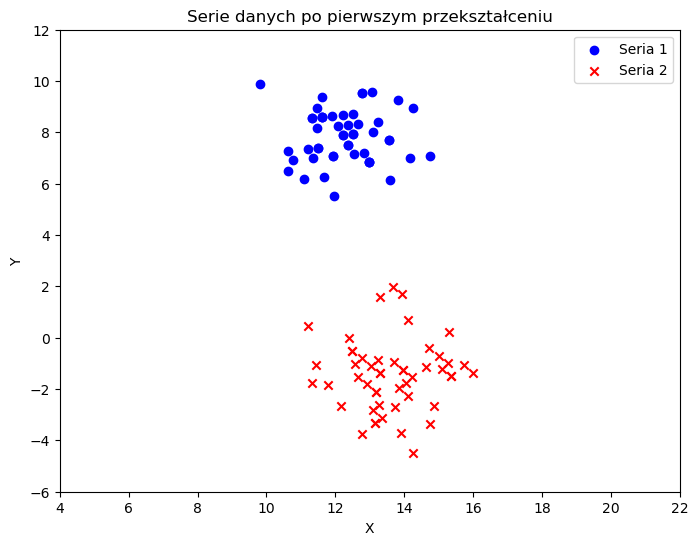

In [240]:
plt.figure(figsize=(8, 6))

plt.scatter(s1_p1[:,[0]], s1_p1[:,[1]], label='Seria 1', color='blue', marker='o')
plt.scatter(s2_p1[:,[0]], s2_p1[:,[1]], label='Seria 2', color='red', marker='x')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(4, 22)
plt.ylim(-6, 12)

plt.legend()
plt.title('Serie danych po pierwszym przekształceniu')
plt.show()

### Wartości i wektory własne serii 2 po pierwszym przekształceniu

In [245]:
num_iterations = 10000
eigenvalues_2, eigenvectors_2 = eigenvalues_eigenvectors(cov_matrix_s2_p1,num_iterations)

print(f"Wartość własna:\n {eigenvalues_2}")
print(f"Wektor własny:\n {eigenvectors_2}")

Wartość własna:
 [1.8549363100162959, 1.2823745071809238]
Wektor własny:
 [[-5.1384689e-16  1.0000000e+00]
 [ 1.0000000e+00  5.1384689e-16]]


### Przekształcenie 2
Przemnożenie serii po pierwszym przekształceniu przez wektory własne serii 2 po pierwszym przekształceniu

In [246]:
#p2 przekształcenie drugie
s1_p2 = s1_p1 * eigenvectors_2.T
s1_p2 = np.asarray(s1_p2)
s2_p2 = s2_p1 * eigenvectors_2.T
s2_p2 = np.asarray(s2_p2)
(s1_p2, s2_p2)

(array([[ 7.93561136, 12.51731415],
        [ 8.95720138, 11.46556321],
        [ 7.40686601, 11.49615112],
        [ 7.36653415, 11.2022054 ],
        [ 7.16044367, 12.5326081 ],
        [ 7.68918902, 13.55377112],
        [ 6.26428042, 11.6660649 ],
        [ 7.8952795 , 12.22336843],
        [ 7.28587044, 10.61431397],
        [ 8.58978347, 11.62018305],
        [ 8.42402484, 13.24453146],
        [ 7.07977996, 11.94471667],
        [ 8.54945161, 11.32623733],
        [ 6.51070275, 10.62960792],
        [ 8.95277019, 14.26569449],
        [ 7.07534877, 14.74484794],
        [ 7.68918902, 13.55377112],
        [ 7.93561136, 12.51731415],
        [ 9.27985624, 13.81712894],
        [ 6.83335762, 12.98117364],
        [ 9.52627858, 12.78067196],
        [ 7.20077553, 12.82655381],
        [ 5.52944459, 11.97530457],
        [ 8.67044718, 12.20807448],
        [ 7.07977996, 11.94471667],
        [ 9.36495115, 11.6048891 ],
        [ 7.8952795 , 12.22336843],
        [ 8.34336113, 12.656

### Macierz kowariancji serii 1 po drugim przekształceniu
Jest jednostkowa

In [247]:
cov_matrix_s1_p2 = cov_for_dataset(s1_p2)
cov_matrix_s1_p2

matrix([[1.00000000e+00, 2.44110288e-15],
        [2.44110288e-15, 1.00000000e+00]])

### Macierz kowariancji serii 2 po drugim przekształceniu
Jest diagonalna, czyli nie ma korelacji między zmiennymi. Operacja wybielania przebiegła pomyślnie

In [249]:
cov_matrix_s2_p2 = cov_for_dataset(s2_p2)
cov_matrix_s2_p2

matrix([[1.85493631e+00, 8.65973959e-17],
        [8.65973959e-17, 1.28237451e+00]])

In [250]:
### Wykres serii po drugim przekształceniu - po wykonaniu operacji wybielania

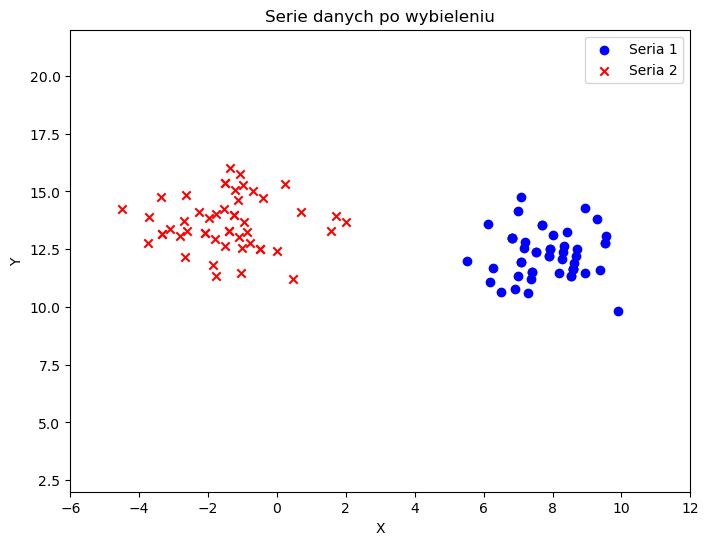

In [252]:
plt.figure(figsize=(8, 6))

plt.scatter(s1_p2[:,[0]], s1_p2[:,[1]], label='Seria 1', color='blue', marker='o')
plt.scatter(s2_p2[:,[0]], s2_p2[:,[1]], label='Seria 2', color='red', marker='x')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-6, 12)
plt.ylim(2, 22)

plt.legend()
plt.title('Serie danych po wybieleniu')
plt.show()

### Wczytanie danych symulujących wykres na wykładzie
Zbiór danych reprezentującego dwie serie odtwarzające sytuację z wykładu

In [253]:
df = pd.read_csv('input_data.csv', sep=',')
dataset = df.to_numpy()
df

,x1,y1,x2,y2
0,-0.029379,8.557853,7.391919,1.970219
1,-1.346758,4.396907,8.300181,1.404367
2,1.940835,8.061176,8.871272,2.531024
3,-0.409299,7.844112,7.424737,1.959036
4,-0.150709,8.001237,9.485289,2.284859
5,-0.917286,8.278376,7.949395,1.834776
6,0.029407,7.194912,9.449022,2.561718
7,-0.076171,10.298827,7.675431,1.676029
8,-0.870065,6.205615,11.149437,1.576669
9,-0.099980,7.462890,10.242971,2.586084


### Przypisanie do zmiennych danych ze zbioru

In [254]:
x1 = dataset[:, 0]
y1 = dataset[:, 1]
x2 = dataset[:, 2]
y2 = dataset[:, 3]

### Wykres przedstawiający serie wejściowe

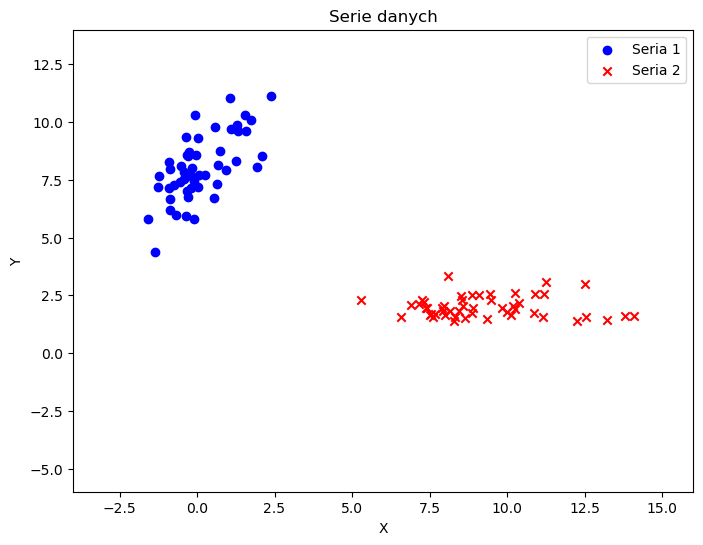

In [255]:
plt.figure(figsize=(8, 6))

plt.scatter(x1, y1, label='Seria 1', color='blue', marker='o')
plt.scatter(x2, y2, label='Seria 2', color='red', marker='x')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-4, 16)
plt.ylim(-6, 14)

plt.legend()
plt.title('Serie danych')
plt.show()

### Macierz kowariancji dla serii 1

In [256]:
cov_dataset = np.array(dataset[:,[0,1]], dtype='double')
cov_matrix = cov_for_dataset(cov_dataset)
cov_matrix

matrix([[0.90897662, 0.8975315 ],
        [0.8975315 , 1.99376882]])

### Wartości i wektory własne dla serii 1

In [257]:
num_iterations = 10000
eigenvalues_1, eigenvectors_1 = eigenvalues_eigenvectors(cov_matrix, num_iterations)

print(f"Wartość własna:\n {eigenvalues_1}")
print(f"Wektor własny:\n {eigenvectors_1}")

Wartość własna:
 [2.500065395480083, 0.40268005031847237]
Wektor własny:
 [[ 0.4913188   0.87097982]
 [ 0.87097982 -0.4913188 ]]


In [258]:
K = eigenvectors_1
K

matrix([[ 0.4913188 ,  0.87097982],
        [ 0.87097982, -0.4913188 ]])

### A = INV(I * pierwiastek_2(wartości_własne))

In [259]:
A = np.linalg.inv(np.identity(2) * np.sqrt(eigenvalues_1)) # INV(I * pierwisawartości_własne)
A

array([[0.63244726, 0.        ],
       [0.        , 1.57586839]])

### Seria 1 - przekształcenie 1

In [260]:
# p1 = przekształcenie pierwsze
s1_p1 = (A * K * np.array(dataset[:,[0,1]], dtype='double').T).T
s1_p1 = np.array(s1_p1)
s1_p1

array([[ 4.70495414, -6.66627375],
       [ 2.00354827, -5.25281396],
       [ 5.04357117, -3.57750359],
       [ 4.19373661, -6.6351162 ],
       [ 4.36064139, -6.40184289],
       [ 4.27510234, -7.6685842 ],
       [ 3.97244608, -5.53032543],
       [ 5.6494274 , -8.07845336],
       [ 3.14799749, -5.99892755],
       [ 4.07985684, -5.91539873],
       [ 5.04315935, -5.74292474],
       [ 4.66254379, -4.89096242],
       [ 2.71004846, -6.67367577],
       [ 4.26913761, -5.88726381],
       [ 4.70209784, -5.37825521],
       [ 4.59931925, -6.98885335],
       [ 4.02864609, -6.40911407],
       [ 5.12577711, -7.16627182],
       [ 4.96940951, -4.68847534],
       [ 5.7113624 , -5.6171828 ],
       [ 5.79838579, -5.28996014],
       [ 5.04409078, -7.72743026],
       [ 6.10514878, -5.45976686],
       [ 3.76210783, -5.85961496],
       [ 5.84568461, -5.91034826],
       [ 6.40744839, -7.07680624],
       [ 4.31538125, -6.97322351],
       [ 3.84744596, -7.61334559],
       [ 5.36362118,

### Macierz kowariancji dla serii 1 - pierwszego przekształcenia
Możemy zauważyć że jest jednostkowa, co oznacza brak korelacji między zmiennymi

In [261]:
cov_matrix_s1_p1 = cov_for_dataset(s1_p1)
cov_matrix_s1_p1

matrix([[ 1.00000000e+00, -6.55031585e-16],
        [-6.55031585e-16,  1.00000000e+00]])

### Seria 2 - przekształcenie 1 (na podstawie A i wektorów własnych serii 1)

In [262]:
s2_p1 = (A * K * np.array(dataset[:,[2,3]], dtype='double').T).T
s2_p1 = np.array(s2_p1)
s2_p1

array([[ 3.38220759,  8.62032537],
       [ 3.35273608, 10.30507305],
       [ 4.15081044, 10.21660495],
       [ 3.38624518,  8.67402874],
       [ 4.20600641, 11.24996794],
       [ 3.48082508,  9.4903565 ],
       [ 4.34724445, 10.98583029],
       [ 3.30825023,  9.23723809],
       [ 4.33300697, 14.0824129 ],
       [ 4.60737274, 12.05670031],
       [ 3.24358861,  9.06542799],
       [ 5.54046005, 14.87247721],
       [ 3.38815156,  8.1682828 ],
       [ 4.00574979,  9.76080889],
       [ 4.80687883, 12.9630302 ],
       [ 3.52323564, 10.69588981],
       [ 4.3663796 ,  8.51025193],
       [ 3.7016681 , 10.83377836],
       [ 4.33143742, 13.58017614],
       [ 5.19496961, 13.08261818],
       [ 4.20863681, 10.55971537],
       [ 4.25262597, 12.59041587],
       [ 3.51978025,  8.17017014],
       [ 3.26864799,  9.04150991],
       [ 3.28550441,  7.88498658],
       [ 4.57236183, 15.7571774 ],
       [ 3.53914884,  9.81810286],
       [ 3.62944544, 10.17795836],
       [ 4.76866613,

### Macierz kowariancji serii 2 - przekształcenie pierwsze

In [263]:
cov_matrix_s2_p1 = cov_for_dataset(s2_p1)
cov_matrix_s2_p1

matrix([[0.40886996, 1.4783835 ],
        [1.4783835 , 7.18423069]])

### Wykres przedstawiający serie po pierwszym przekształceniu

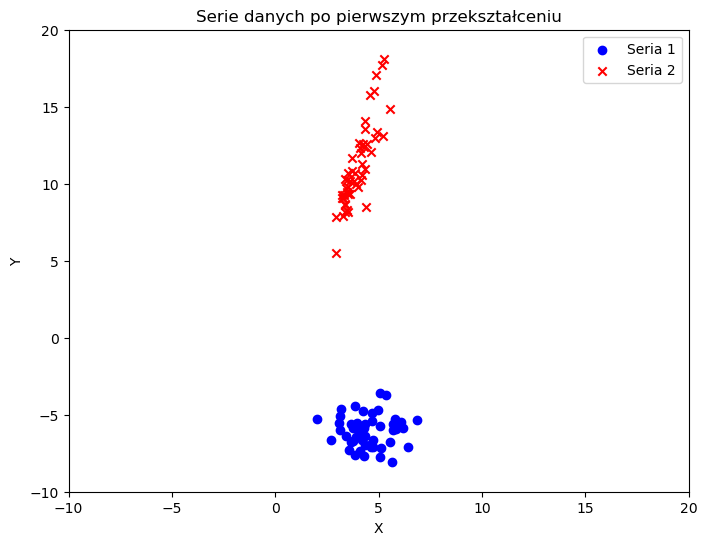

In [264]:
plt.figure(figsize=(8, 6))

plt.scatter(s1_p1[:,[0]], s1_p1[:,[1]], label='Seria 1', color='blue', marker='o')
plt.scatter(s2_p1[:,[0]], s2_p1[:,[1]], label='Seria 2', color='red', marker='x')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-10, 20)
plt.ylim(-10, 20)

plt.legend()
plt.title('Serie danych po pierwszym przekształceniu')
plt.show()

### Wartości i wektory własne serii 2 po pierwszym przekształceniu

In [265]:
num_iterations = 10000
eigenvalues_2, eigenvectors_2 = eigenvalues_eigenvectors(cov_matrix_s2_p1,num_iterations)

print(f"Wartość własna:\n {eigenvalues_2}")
print(f"Wektor własny:\n {eigenvectors_2}")

Wartość własna:
 [7.492764064061773, 0.10033658613728481]
Wektor własny:
 [[ 0.20429491  0.97890939]
 [ 0.97890939 -0.20429491]]


### Przekształcenie 2
Przemnożenie serii po pierwszym przekształceniu przez wektory własne serii 2 po pierwszym przekształceniu

In [266]:
#p2 przekształcenie drugie
s1_p2 = s1_p1 * eigenvectors_2.T
s1_p2 = np.asarray(s1_p2)
s2_p2 = s2_p1 * eigenvectors_2.T
s2_p2 = np.asarray(s2_p2)
(s1_p2, s2_p2)

(array([[-5.56447979,  5.96760956],
        [-4.7327142 ,  3.03441535],
        [-2.47167595,  5.66806494],
        [-5.63841851,  5.46080859],
        [-5.37596728,  5.57653669],
        [-6.63346743,  5.75159051],
        [-4.60213698,  5.01848208],
        [-6.75392459,  7.1806644 ],
        [-5.22928664,  4.30715464],
        [-4.95714538,  5.202296  ],
        [-4.59151118,  6.11004631],
        [-3.83527508,  5.5634066 ],
        [-5.97927477,  4.01628985],
        [-4.89093475,  5.3818369 ],
        [-4.30420988,  5.70167787],
        [-5.90183665,  5.93010394],
        [-5.45091005,  5.25302885],
        [-5.9679606 ,  6.48170417],
        [-3.57436747,  5.82243326],
        [-4.33191073,  6.73846812],
        [-3.99381096,  6.7568062 ],
        [-6.53397197,  6.51638247],
        [-4.09736623,  7.09179003],
        [-4.96745263,  4.87985217],
        [-4.5914518 ,  6.9298496 ],
        [-5.61854299,  7.71806686],
        [-5.94454355,  5.64896127],
        [-6.66676186,  5.321

### Macierz kowariancji serii pierwszej po drugim przekształceniu
Jest jednostkowa, brak korelacji między zmiennymi

In [267]:
cov_matrix_s1_p2 = cov_for_dataset(s1_p2)
cov_matrix_s1_p2

matrix([[ 1.00000000e+00, -3.91242594e-15],
        [-3.91242594e-15,  1.00000000e+00]])

### Macierz kowariancji serii drugiej po drugim przekształceniu
Macierz jest diagonalna, czyli wybielanie zostało przeprowadzone pomyślnie.

In [268]:
cov_matrix_s2_p2 = cov_for_dataset(s2_p2)
cov_matrix_s2_p2

matrix([[ 7.49276406e+00, -2.59842148e-14],
        [-2.59842148e-14,  1.00336586e-01]])

### Wykres serii po drugim przekształceniu - po wykonaniu operacji wybielania


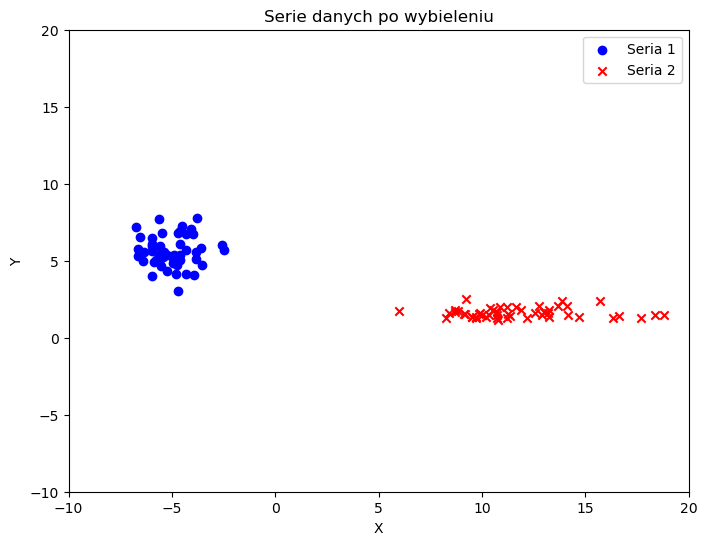

In [269]:
plt.figure(figsize=(8, 6))

plt.scatter(s1_p2[:,[0]], s1_p2[:,[1]], label='Seria 1', color='blue', marker='o')
plt.scatter(s2_p2[:,[0]], s2_p2[:,[1]], label='Seria 2', color='red', marker='x')

plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(-10, 20)
plt.ylim(-10, 20)

plt.legend()
plt.title('Serie danych po wybieleniu')
plt.show()

### Wnioski

Powyższe działania na zbiorach danych pokazują poprawne zaimplementowane operacje prowadzące do wykonania wybielania.